In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf 

In [333]:
def payoff(cash_ret_list):
    
    payoff = pd.DataFrame(cash_ret_list).pct_change()
    payoff = payoff.fillna(0)
    payoff = (payoff+1).cumprod()
    
    return payoff

# Two uncorrelated assets with negative return

In [334]:
runs = 100

In [335]:
asset_1 = np.random.normal(-1/100, 5, runs)
asset_2 = - asset_1 + np.random.normal(-2/100, 5, runs)



In [336]:
print("Mean of Asset 1: "+str(np.mean(asset_1)))
print("Mean of Asset 2: "+str(np.mean(asset_2)))

print("Correlation:")
print(np.corrcoef(asset_1, asset_2))

Mean of Asset 1: -0.2759710087265991
Mean of Asset 2: 0.9732564620985014
Correlation:
[[ 1.         -0.71029128]
 [-0.71029128  1.        ]]


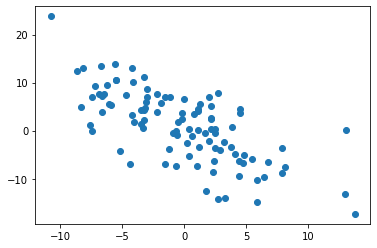

In [337]:
plt.scatter(asset_1, asset_2)

# Portfolio

In [338]:
asset_1 = pd.DataFrame(asset_1/100)
asset_2 = pd.DataFrame(asset_2/100)
asset_1.iloc[0]=0
asset_2.iloc[0]=0

asset_1=asset_1 + 1
asset_2=asset_2 + 1

ret_1 = (asset_1).cumprod()
ret_2 = (asset_2).cumprod()

In [339]:
init = 100
ret = []
weight = 0.5
for i in range(runs):
    ret.append(init)
    as_1 = init * weight
    as_2 = init * weight
        
    as_1 = float(as_1 * asset_1.loc[i])
    as_2 = float(as_2 * asset_2.loc[i])
        
    init = as_1 + as_2

In [340]:
port_ret = pd.DataFrame(ret).pct_change()
port_ret = port_ret.fillna(0)
port_ret = (port_ret + 1).cumprod()

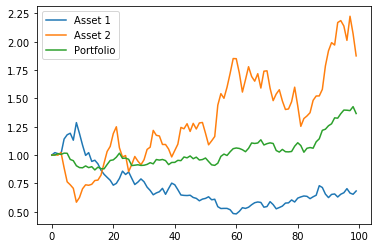

In [501]:
plt.plot(ret_1, label = "Asset 1");
plt.plot(ret_2, label = "Asset 2");
plt.plot(port_ret, label = "Portfolio");
plt.legend();

# new test

In [522]:
num_samples = 10000
std_1 = 20
std_2 = 20

# The desired mean values of the sample.
mu = np.array([0, 0])

# The desired covariance matrix.
corr = np.array([
        [ 1, 0],
        [ 0,  1],
    ])

r = corr * (std_1 * std_2)

# Generate the random samples.
y = np.random.multivariate_normal(mu, r, size=num_samples)
y=pd.DataFrame(y)
y.columns = ["asset_1", "asset_2"]
mult_asset =(y.copy()/100)+1

In [523]:
init = 100
ret = []
as1_weight = 0.5 #1/((std_1 + std_2)/std_1) #risk parity
as2_weight = 1 - as1_weight
for i in range(num_samples):
    ret.append(init)
    as_1 = init * as1_weight
    as_2 = init * as2_weight
        
    as_1 = float(as_1 * mult_asset["asset_1"].loc[i])
    as_2 = float(as_2 * mult_asset["asset_2"].loc[i])
        
    init = as_1 + as_2

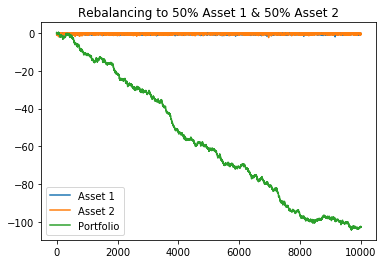

In [524]:
plt.plot(np.log(payoff(mult_asset["asset_1"])), label = "Asset 1")
plt.plot(np.log(payoff(mult_asset["asset_2"])), label = "Asset 2")
plt.plot(np.log(payoff(ret)), label = "Portfolio")
plt.legend();
plt.title("Rebalancing to " + str(round(as1_weight*100))+"% Asset 1 & "+ str(round(as2_weight*100))+"% Asset 2");